### Import libraries

In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM,GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


# Data processing


In [2]:
import pandas as pd
nov = pd.read_csv('NovAll.csv')
apr =pd.read_csv('AprilAll.csv')
nov_apr =pd.read_csv('April_Nov.csv')

In [3]:
nov['Time1'] = nov['Time'].str.replace('_', '')
apr['Time1'] = apr['Time'].str.replace('_', '')
nov_apr['Time1'] = nov_apr['Time'].str.replace('_', '')

In [4]:
nov['time_corrected']= pd.to_datetime(nov['Time1'], format='%Y%m%d%H', errors='coerce')
apr['time_corrected']= pd.to_datetime(apr['Time1'], format='%Y%m%d%H', errors='coerce')
nov_apr['time_corrected']= pd.to_datetime(nov_apr['Time1'], format='%Y%m%d%H', errors='coerce')

In [5]:
nov.set_index('time_corrected', inplace=True)
apr.set_index('time_corrected', inplace=True)
nov_apr.set_index('time_corrected', inplace=True)

In [6]:
nov = nov.drop(['Time','Time1'],axis=1)
apr = apr.drop(['Time','Time1'],axis=1)
nov_apr = nov_apr.drop(['Time','Time1'],axis=1)

In [7]:
print(nov.isnull().sum())
print(apr.isnull().sum())
print(nov_apr.isnull().sum())

traffic information    0
RP                     0
dtype: int64
traffic information    0
RP                     0
dtype: int64
traffic information    0
RP                     0
dtype: int64


In [8]:
nov.columns = nov.columns.str.strip()
apr.columns = apr.columns.str.strip()
nov_apr.columns = nov_apr.columns.str.strip()

# Part B

# SVM, DNN, RBF

## Univariate SVM

In [9]:
nov_apr.head()

,traffic information,RP
time_corrected,,
2015-04-01 00:00:00,78.6,91.7
2015-04-01 01:00:00,80.0,93.7
2015-04-01 02:00:00,80.1,91.4
2015-04-01 03:00:00,80.0,92.7
2015-04-01 04:00:00,79.0,93.5


In [10]:
nov_apr_1 = nov_apr.copy()

In [11]:
nov_apr_1 = nov_apr_1.reset_index()
nov_apr_1['hour'] = nov_apr_1['time_corrected'].dt.hour
nov_apr_1['WEEKDAY'] = (((nov_apr_1.time_corrected).dt.dayofweek) // 5 == 1).astype(float)

In [12]:
nov_apr_uni = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_uni[:1200]
test =nov_apr_uni[1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 


(1200, 2) (1200,) (188, 2) (188,)


In [13]:
#fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_X, train_y)

C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
predict = regressor.predict(test_X)

In [15]:
mae_svm_nov_apr_uni = mean_absolute_error(test_y*100, predict*100)
print (mae_svm_nov_apr_uni)

156.18245427038445


In [16]:
mse_svm_nov_apr_uni = ((predict*100 - test_y*100)**2).mean()

In [17]:
mse_svm_nov_apr_uni

35617.05684641009

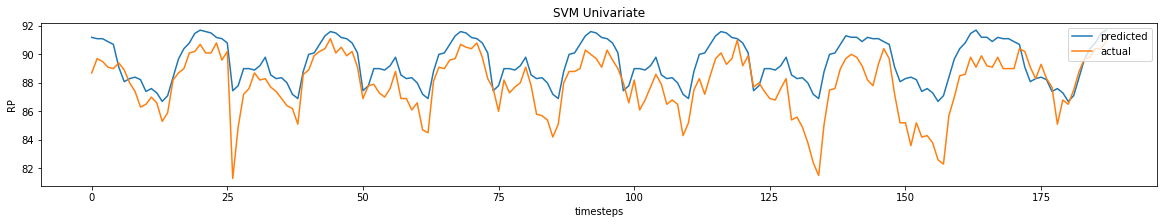

In [18]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predict)
plt.plot(test_y.values)
plt.title('SVM Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# Multivariate SVM

In [19]:
nov_apr_multi = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_multi [:1200]
test =nov_apr_multi [1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['traffic information','hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['traffic information','hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 3) (1200,) (188, 3) (188,)


In [20]:
#fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_X, train_y)

C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
predict = regressor.predict(test_X)

In [22]:
from sklearn.metrics import mean_absolute_error
mae_svm_nov_apr_multi=mean_absolute_error(test_y*100, predict*100)

In [23]:
mae_svm_nov_apr_multi

152.9382920489655

In [24]:
mse_svm_nov_apr_multi = ((predict*100 - test_y*100)**2).mean()

In [25]:
mse_svm_nov_apr_multi

32357.59572020276

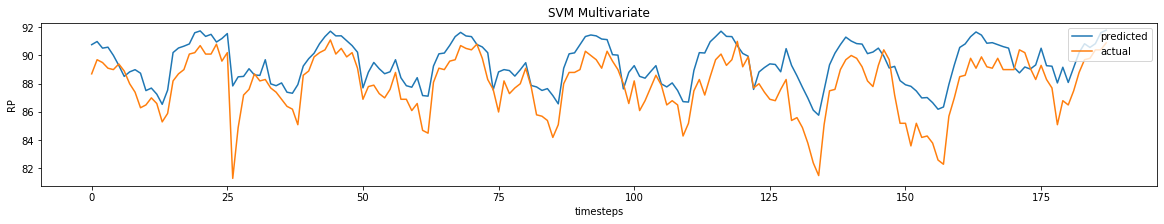

In [26]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predict)
plt.plot(test_y.values)
plt.title('SVM Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# DNN

## Univariate

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [28]:
nov_apr_uni = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_uni[:1200]
test =nov_apr_uni[1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 2) (1200,) (188, 2) (188,)


1. Define a sequential model
2. Add some dense layers
3. Use ‘relu’ as the activation function for the hidden layers
4. Use a ‘normal’ initializer as the kernal_intializer
(Initializers define the way to set the initial random weights of Keras layers.)
5. We will use mean_absolute_error as a loss function
6. Define the output layer with only one node
7. Use ‘linear ’as the activation function for the output layer



Creating DNN architechure with 1 input layer with 128 neurorns for provinding the train data and 3 hidden layers.
As it is regression there is only 1 neuron at the output. The optimization is done using ADAM optimizer with mean absolute error as loss function

In [29]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,249
Trainable params: 165,249
Non-trainable params: 0
_________________________________________________________________


Define a checkpoint callback :

In [30]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]


 Train the model :

In [31]:
history = NN_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)




Train on 960 samples, validate on 240 samples
Epoch 1/100





960/960 [==============================] - 2s 2ms/step - loss: 67.7938 - mean_absolute_error: 67.7938 - val_loss: 37.6160 - val_mean_absolute_error: 37.6160

Epoch 00001: val_loss improved from inf to 37.61597, saving model to Weights-001--37.61597.hdf5
Epoch 2/100
960/960 [==============================] - 0s 281us/step - loss: 35.7371 - mean_absolute_error: 35.7371 - val_loss: 32.1132 - val_mean_absolute_error: 32.1132

Epoch 00002: val_loss improved from 37.61597 to 32.11316, saving model to Weights-002--32.11316.hdf5
Epoch 3/100
960/960 [==============================] - 0s 293us/step - loss: 30.2210 - mean_absolute_error: 30.2210 - val_loss: 23.7848 - val_mean_absolute_error: 23.7848

Epoch 00003: val_loss improved from 32.11316 to 23.78479, saving model to Weights-003--23.78479.hdf5
Epoch 4/100
960/960 [==============================] - 1s 527us/step - loss: 17.6938 - mean_absolute_error: 17.6938 - val_loss: 12.025


Epoch 00028: val_loss did not improve from 1.19307
Epoch 29/100
960/960 [==============================] - 0s 426us/step - loss: 1.5988 - mean_absolute_error: 1.5988 - val_loss: 3.6925 - val_mean_absolute_error: 3.6925

Epoch 00029: val_loss did not improve from 1.19307
Epoch 30/100
960/960 [==============================] - 0s 220us/step - loss: 1.4296 - mean_absolute_error: 1.4296 - val_loss: 2.4030 - val_mean_absolute_error: 2.4030

Epoch 00030: val_loss did not improve from 1.19307
Epoch 31/100
960/960 [==============================] - 0s 397us/step - loss: 1.4787 - mean_absolute_error: 1.4787 - val_loss: 1.7602 - val_mean_absolute_error: 1.7602

Epoch 00031: val_loss did not improve from 1.19307
Epoch 32/100
960/960 [==============================] - 0s 340us/step - loss: 1.5301 - mean_absolute_error: 1.5301 - val_loss: 4.0943 - val_mean_absolute_error: 4.0943

Epoch 00032: val_loss did not improve from 1.19307
Epoch 33/100
960/960 [==============================] - 0s 313us/ste


Epoch 00065: val_loss improved from 1.07102 to 1.03622, saving model to Weights-065--1.03622.hdf5
Epoch 66/100
960/960 [==============================] - 0s 342us/step - loss: 1.7550 - mean_absolute_error: 1.7550 - val_loss: 2.8326 - val_mean_absolute_error: 2.8326

Epoch 00066: val_loss did not improve from 1.03622
Epoch 67/100
960/960 [==============================] - 0s 218us/step - loss: 1.3418 - mean_absolute_error: 1.3418 - val_loss: 2.7896 - val_mean_absolute_error: 2.7896

Epoch 00067: val_loss did not improve from 1.03622
Epoch 68/100
960/960 [==============================] - 0s 283us/step - loss: 1.3331 - mean_absolute_error: 1.3331 - val_loss: 1.6495 - val_mean_absolute_error: 1.6495

Epoch 00068: val_loss did not improve from 1.03622
Epoch 69/100
960/960 [==============================] - 0s 222us/step - loss: 1.3728 - mean_absolute_error: 1.3728 - val_loss: 1.9676 - val_mean_absolute_error: 1.9676

Epoch 00069: val_loss did not improve from 1.03622
Epoch 70/100
960/960 

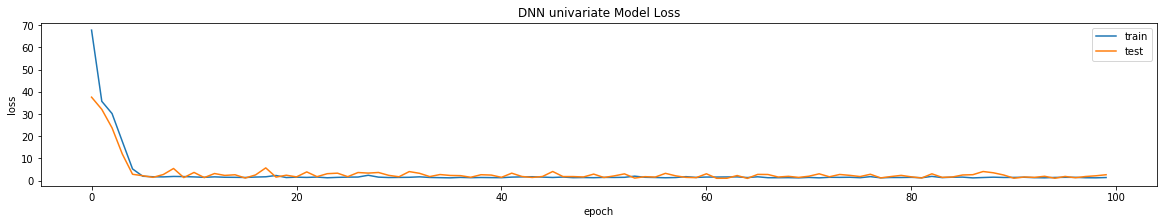

In [32]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN univariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [33]:
# Load wights file of the best model :/content/Weights-049--0.01040.hdf5
wights_file = 'Weights-065--1.03622.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [34]:
predictions = NN_model.predict(test_X)

In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y*100, predictions.ravel()*100)) 

Mean Absolute Error: 98.64450527759308


In [36]:
DNN_univariate_mae =  metrics.mean_absolute_error(test_y*100, predictions.ravel()*100)

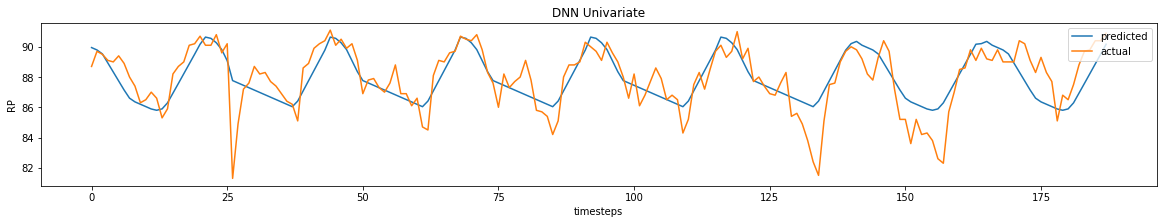

In [37]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predictions)
plt.plot(test_y.values)
plt.title('DNN Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [38]:
nov_apr_multi = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_multi [:1200]
test =nov_apr_multi [1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['traffic information','hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['traffic information','hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 3) (1200,) (188, 3) (188,)


In [39]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 165,377
Trainable params: 165,377
Non-trainable params: 0
_________________________________________________________________


In [40]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weightsmulti-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [41]:
history = NN_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 960 samples, validate on 240 samples
Epoch 1/100
960/960 [==============================] - 2s 2ms/step - loss: 38.5971 - mean_absolute_error: 38.5971 - val_loss: 9.6927 - val_mean_absolute_error: 9.6927

Epoch 00001: val_loss improved from inf to 9.69269, saving model to Weightsmulti-001--9.69269.hdf5
Epoch 2/100
960/960 [==============================] - 0s 262us/step - loss: 2.9394 - mean_absolute_error: 2.9394 - val_loss: 2.8141 - val_mean_absolute_error: 2.8141

Epoch 00002: val_loss improved from 9.69269 to 2.81410, saving model to Weightsmulti-002--2.81410.hdf5
Epoch 3/100
960/960 [==============================] - 0s 443us/step - loss: 1.3121 - mean_absolute_error: 1.3121 - val_loss: 2.9554 - val_mean_absolute_error: 2.9554

Epoch 00003: val_loss did not improve from 2.81410
Epoch 4/100
960/960 [==============================] - 0s 252us/step - loss: 1.4549 - mean_absolute_error: 1.4549 - val_loss: 2.7564 - val_mean_absolute_error: 2.7564

Epoch 00004: val_loss improve

960/960 [==============================] - 0s 231us/step - loss: 1.5669 - mean_absolute_error: 1.5669 - val_loss: 3.1527 - val_mean_absolute_error: 3.1527

Epoch 00073: val_loss did not improve from 1.04658
Epoch 74/100
960/960 [==============================] - 0s 226us/step - loss: 1.4358 - mean_absolute_error: 1.4358 - val_loss: 1.4317 - val_mean_absolute_error: 1.4317

Epoch 00074: val_loss did not improve from 1.04658
Epoch 75/100
960/960 [==============================] - 0s 217us/step - loss: 1.5465 - mean_absolute_error: 1.5465 - val_loss: 3.9414 - val_mean_absolute_error: 3.9414

Epoch 00075: val_loss did not improve from 1.04658
Epoch 76/100
960/960 [==============================] - 0s 218us/step - loss: 1.6057 - mean_absolute_error: 1.6057 - val_loss: 1.0987 - val_mean_absolute_error: 1.0987

Epoch 00076: val_loss did not improve from 1.04658
Epoch 77/100
960/960 [==============================] - 0s 235us/step - loss: 1.3504 - mean_absolute_error: 1.3504 - val_loss: 2.9514

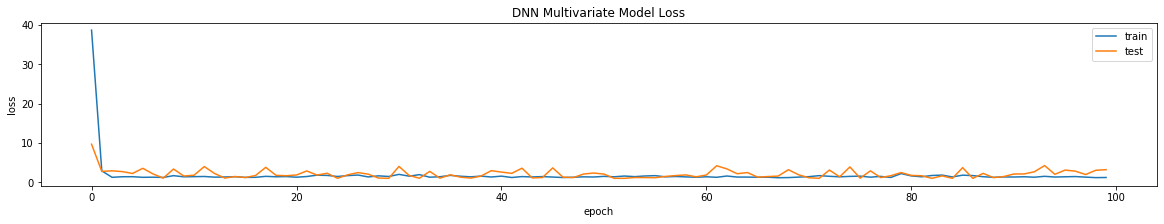

In [42]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Multivariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [43]:
# Load wights file of the best model :/content//content/Weightsmulti-038--0.00989.hdf5
wights_file = 'Weightsmulti-087--1.03896.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [44]:
predictions = NN_model.predict(test_X)

In [45]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions.ravel())) 

Mean Absolute Error: 0.9712301213690576


In [46]:
DNN_multivariate_mae =  metrics.mean_absolute_error(test_y*100, predictions.ravel()*100)

In [47]:
DNN_multivariate_mae

97.12301570811171

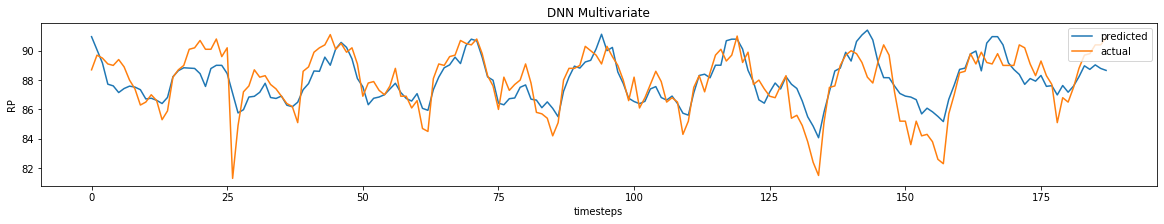

In [48]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predictions)
plt.plot(test_y.values)
plt.title('DNN Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# GRU


GRU is a type of RNN.
GRU’s were created as the solution to short-term memory.
They have internal mechanisms called gates that can regulate the flow of information.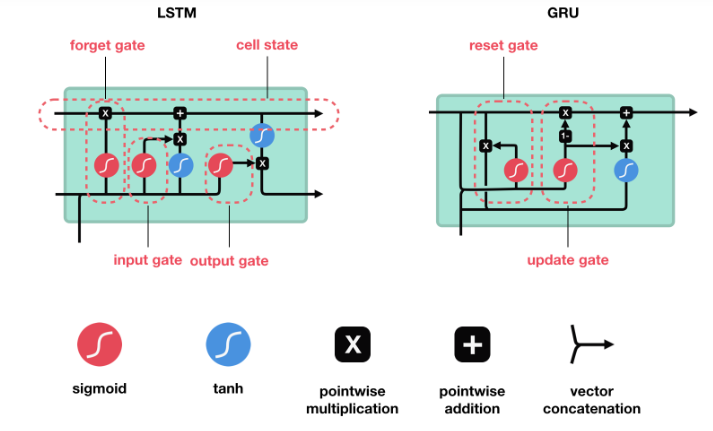

These gates can learn which data in a sequence is important to keep or throw away. By doing that, it can pass relevant information down the long chain of sequences to make predictions. Almost all state of the art results based on recurrent neural networks are achieved with these two networks. LSTM’s and GRU’s can be found in speech recognition, speech synthesis, and text generation. You can even use them to generate captions for videos.

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

## Univariate

In [49]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [50]:
nov_apr.head()

,traffic information,RP
time_corrected,,
2015-04-01 00:00:00,78.6,91.7
2015-04-01 01:00:00,80.0,93.7
2015-04-01 02:00:00,80.1,91.4
2015-04-01 03:00:00,80.0,92.7
2015-04-01 04:00:00,79.0,93.5


In [51]:
## resampling of data over hour for Nov
nov_apr_resample = nov_apr.resample('h').mean() 
nov_apr_resample.shape

(4296, 2)

In [52]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = nov_apr_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed_nov_apr = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
print(reframed_nov_apr.head())

   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.613333   0.728571  0.653333  0.728571
2   0.653333   0.728571  0.653333  0.714286
3   0.653333   0.714286  0.600000  0.628571
4   0.600000   0.628571  0.560000  0.685714
5   0.560000   0.685714  0.373333  0.557143


In [53]:
reframed_nov_apr_uni = reframed_nov_apr.drop(['var1(t-1)','var1(t)'],axis=1)

In [54]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [55]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
model compiled


In [56]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1200 samples, validate on 182 samples
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4449 - val_loss: 0.4996
Epoch 2/20
1200/1200 [==============================] - 0s 82us/step - loss: 0.3854 - val_loss: 0.4251
Epoch 3/20
1200/1200 [==============================] - 0s 75us/step - loss: 0.3238 - val_loss: 0.3521
Epoch 4/20
1200/1200 [==============================] - 0s 120us/step - loss: 0.2629 - val_loss: 0.2807
Epoch 5/20
1200/1200 [==============================] - 0s 80us/step - loss: 0.2049 - val_loss: 0.2120
Epoch 6/20
1200/1200 [==============================] - 0s 145us/step - loss: 0.1511 - val_loss: 0.1480
Epoch 7/20
1200/1200 [==============================] - 0s 161us/step - loss: 0.1012 - val_loss: 0.0922
Epoch 8/20
1200/1200 [==============================] - 0s 119us/step - loss: 0.0598 - val_loss: 0.0484
Epoch 9/20
1200/1200 [==========

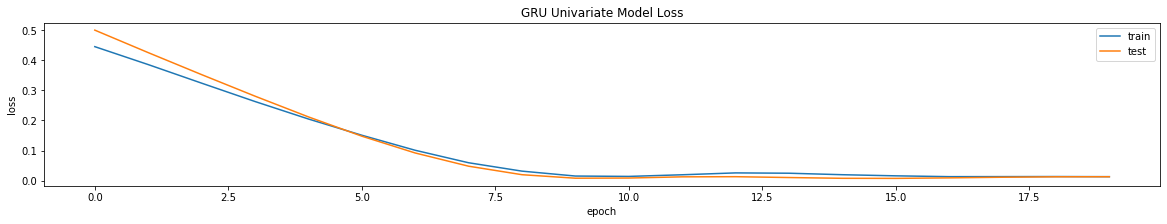

In [57]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Univariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [58]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_univariate = mean_absolute_error(inv_y*100, inv_yhat*100)
print('Test MSE: %.5f' % mae_GRU_univariate)

Test MSE: 74.17929


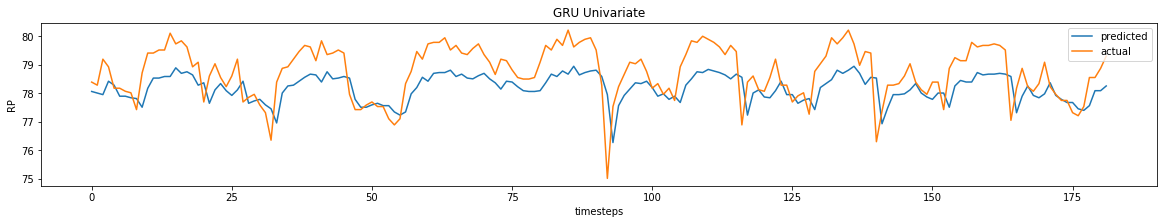

In [59]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('GRU Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [60]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [61]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],2)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')

model compiled


In [62]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Train on 1200 samples, validate on 182 samples
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4610 - val_loss: 0.4930
Epoch 2/20
1200/1200 [==============================] - 0s 74us/step - loss: 0.3748 - val_loss: 0.3968
Epoch 3/20
1200/1200 [==============================] - 0s 68us/step - loss: 0.2974 - val_loss: 0.3077
Epoch 4/20
1200/1200 [==============================] - 0s 82us/step - loss: 0.2247 - val_loss: 0.2258
Epoch 5/20
1200/1200 [==============================] - 0s 118us/step - loss: 0.1591 - val_loss: 0.1522
Epoch 6/20
1200/1200 [==============================] - 0s 119us/step - loss: 0.1031 - val_loss: 0.0899
Epoch 7/20
1200/1200 [==============================] - 0s 72us/step - loss: 0.0575 - val_loss: 0.0430
Epoch 8/20
1200/1200 [==============================] - 0s 76us/step - loss: 0.0268 - val_loss: 0.0151
Epoch 9/20
1200/1200 [==============================] - 0s 127us/step - loss: 0.0136 - val_loss: 0.0059
Epoch 10/20
1200/1200 [=

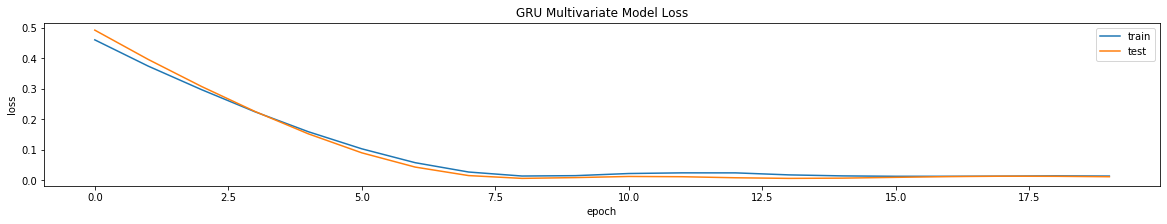

In [63]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Multivariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [64]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_multivariate = mean_absolute_error(inv_y*100, inv_yhat*100)
print('Test MSE: %.5f' % mae_GRU_multivariate)

Test MSE: 67.28311


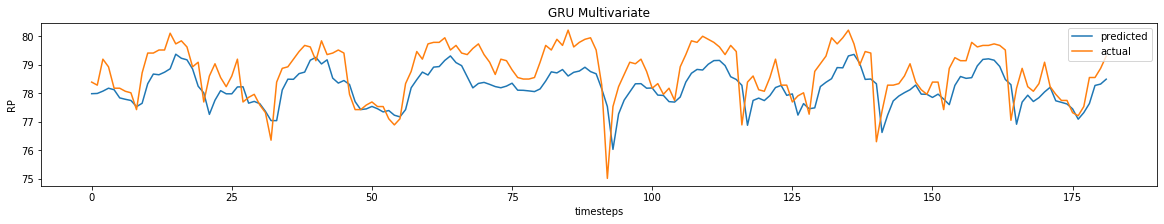

In [65]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('GRU Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# RBFN


## Univariate

In [66]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [67]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [68]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='adam')

In [69]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1200 samples, validate on 182 samples
Epoch 1/20
 - 2s - loss: 0.2252 - val_loss: 0.0594
Epoch 2/20
 - 0s - loss: 0.1246 - val_loss: 0.0332
Epoch 3/20
 - 0s - loss: 0.0774 - val_loss: 0.0339
Epoch 4/20
 - 0s - loss: 0.0600 - val_loss: 0.0407
Epoch 5/20
 - 0s - loss: 0.0545 - val_loss: 0.0448
Epoch 6/20
 - 0s - loss: 0.0526 - val_loss: 0.0457
Epoch 7/20
 - 0s - loss: 0.0517 - val_loss: 0.0453
Epoch 8/20
 - 0s - loss: 0.0512 - val_loss: 0.0447
Epoch 9/20
 - 0s - loss: 0.0507 - val_loss: 0.0441
Epoch 10/20
 - 0s - loss: 0.0502 - val_loss: 0.0436
Epoch 11/20
 - 0s - loss: 0.0497 - val_loss: 0.0432
Epoch 12/20
 - 0s - loss: 0.0492 - val_loss: 0.0427
Epoch 13/20
 - 0s - loss: 0.0486 - val_loss: 0.0422
Epoch 14/20
 - 0s - loss: 0.0480 - val_loss: 0.0417
Epoch 15/20
 - 0s - loss: 0.0474 - val_loss: 0.0412
Epoch 16/20
 - 0s - loss: 0.0469 - val_loss: 0.0408
Epoch 17/20
 - 0s - loss: 0.0463 - val_loss: 0.0403
Epoch 18/20
 - 0s - loss: 0.0457 - val_loss: 0.0398
Epoch 19/20
 - 0s - loss: 

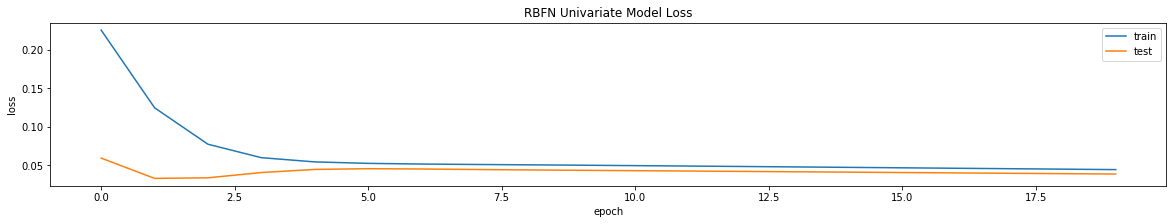

In [70]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Univariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [71]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [72]:
# calculate RMSE
from sklearn.metrics import mean_absolute_error
mae_RBFN_univariate = mean_absolute_error(inv_y*100, inv_yhat*100)
print('Test MSE: %.5f' % mae_RBFN_univariate)

Test MSE: 122.95151


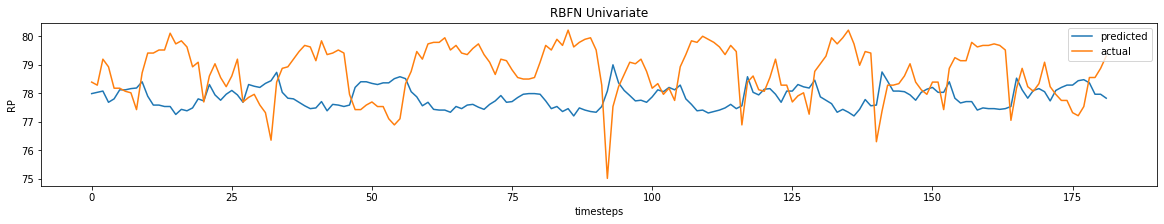

In [73]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('RBFN Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [74]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [75]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='adam')

In [76]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1200 samples, validate on 182 samples
Epoch 1/20
 - 2s - loss: 0.2209 - val_loss: 0.2179
Epoch 2/20
 - 0s - loss: 0.1063 - val_loss: 0.1136
Epoch 3/20
 - 0s - loss: 0.0582 - val_loss: 0.0669
Epoch 4/20
 - 0s - loss: 0.0469 - val_loss: 0.0503
Epoch 5/20
 - 0s - loss: 0.0466 - val_loss: 0.0453
Epoch 6/20
 - 0s - loss: 0.0469 - val_loss: 0.0441
Epoch 7/20
 - 0s - loss: 0.0463 - val_loss: 0.0436
Epoch 8/20
 - 0s - loss: 0.0455 - val_loss: 0.0430
Epoch 9/20
 - 0s - loss: 0.0445 - val_loss: 0.0422
Epoch 10/20
 - 0s - loss: 0.0437 - val_loss: 0.0413
Epoch 11/20
 - 0s - loss: 0.0428 - val_loss: 0.0404
Epoch 12/20
 - 0s - loss: 0.0419 - val_loss: 0.0395
Epoch 13/20
 - 0s - loss: 0.0410 - val_loss: 0.0386
Epoch 14/20
 - 0s - loss: 0.0401 - val_loss: 0.0377
Epoch 15/20
 - 0s - loss: 0.0392 - val_loss: 0.0369
Epoch 16/20
 - 0s - loss: 0.0383 - val_loss: 0.0360
Epoch 17/20
 - 0s - loss: 0.0374 - val_loss: 0.0351
Epoch 18/20
 - 0s - loss: 0.0365 - val_loss: 0.0342
Epoch 19/20
 - 0s - loss: 

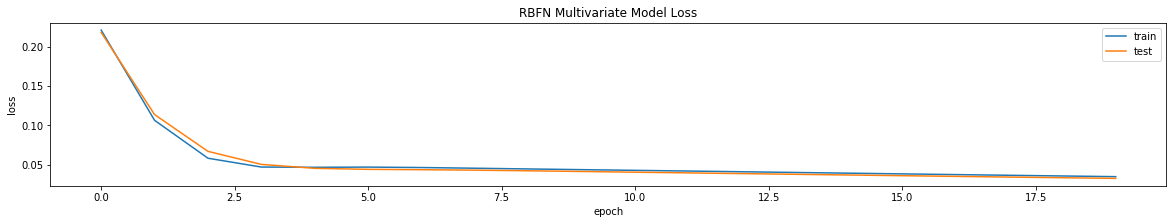

In [77]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Multivariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [78]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE

In [79]:
mae_RBFN_multivariate = mean_absolute_error(inv_y*100, inv_yhat*100)
print('Test MSE: %.5f' % mae_RBFN_multivariate)

Test MSE: 110.53508


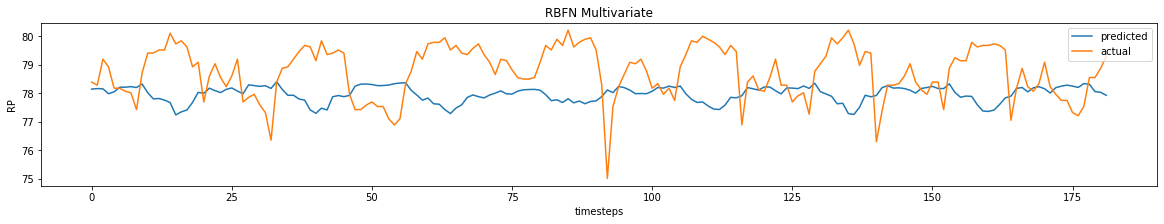

In [80]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('RBFN Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# LSTM

## Univariate

In [81]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [82]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [83]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1200 samples, validate on 182 samples
Epoch 1/20
 - 4s - loss: 0.3364 - val_loss: 0.3307
Epoch 2/20
 - 0s - loss: 0.1965 - val_loss: 0.1815
Epoch 3/20
 - 0s - loss: 0.0908 - val_loss: 0.0745
Epoch 4/20
 - 0s - loss: 0.0305 - val_loss: 0.0220
Epoch 5/20
 - 0s - loss: 0.0120 - val_loss: 0.0097
Epoch 6/20
 - 0s - loss: 0.0129 - val_loss: 0.0088
Epoch 7/20
 - 0s - loss: 0.0136 - val_loss: 0.0093
Epoch 8/20
 - 0s - loss: 0.0127 - val_loss: 0.0097
Epoch 9/20
 - 0s - loss: 0.0129 - val_loss: 0.0095
Epoch 10/20
 - 0s - loss: 0.0125 - val_loss: 0.0093
Epoch 11/20
 - 0s - loss: 0.0127 - val_loss: 0.0093
Epoch 12/20
 - 0s - loss: 0.0127 - val_loss: 0.0092
Epoch 13/20
 - 0s - loss: 0.0126 - val_loss: 0.0092
Epoch 14/20
 - 0s - loss: 0.0123 - val_loss: 0.0091
Epoch 15/20
 - 0s - loss: 0.0122 - val_loss: 0.0090
Epoch 16/20
 - 0s - loss: 0.0121 - val_loss: 0.0090
Epoch 17/20
 - 0s - loss: 0.0120 - val_loss: 0.0089
Epoch 18/20
 - 0s - loss: 0.0123 - val_loss: 0.0088
Epoch 19/20
 - 0s - loss: 

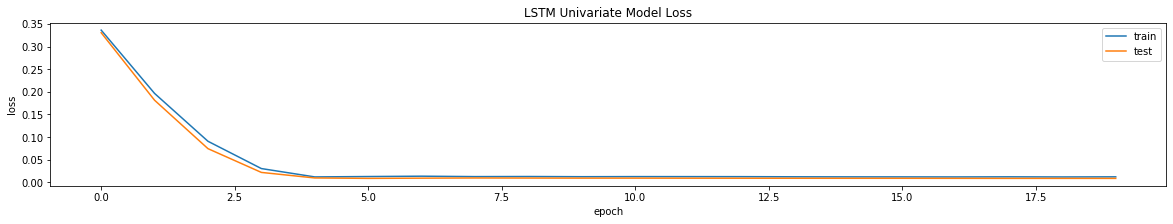

In [84]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Univariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [85]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
lstm_mae_lstm_univariate = mean_absolute_error(inv_y*100, inv_yhat*100)
print('Test MSE: %.5f' % lstm_mae_lstm_univariate)

Test MSE: 56.19644


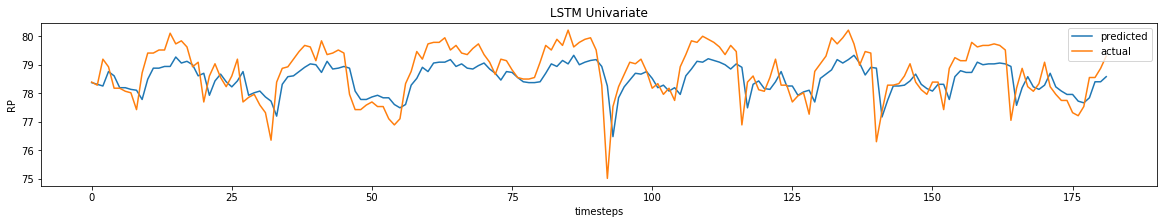

In [86]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('LSTM Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [87]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [88]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [89]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1200 samples, validate on 182 samples
Epoch 1/20
 - 4s - loss: 0.3610 - val_loss: 0.3385
Epoch 2/20
 - 0s - loss: 0.1895 - val_loss: 0.1592
Epoch 3/20
 - 0s - loss: 0.0696 - val_loss: 0.0457
Epoch 4/20
 - 0s - loss: 0.0155 - val_loss: 0.0092
Epoch 5/20
 - 0s - loss: 0.0105 - val_loss: 0.0060
Epoch 6/20
 - 0s - loss: 0.0124 - val_loss: 0.0067
Epoch 7/20
 - 0s - loss: 0.0121 - val_loss: 0.0074
Epoch 8/20
 - 0s - loss: 0.0117 - val_loss: 0.0073
Epoch 9/20
 - 0s - loss: 0.0114 - val_loss: 0.0071
Epoch 10/20
 - 0s - loss: 0.0116 - val_loss: 0.0070
Epoch 11/20
 - 0s - loss: 0.0119 - val_loss: 0.0072
Epoch 12/20
 - 0s - loss: 0.0117 - val_loss: 0.0072
Epoch 13/20
 - 0s - loss: 0.0116 - val_loss: 0.0070
Epoch 14/20
 - 0s - loss: 0.0117 - val_loss: 0.0071
Epoch 15/20
 - 0s - loss: 0.0115 - val_loss: 0.0068
Epoch 16/20
 - 0s - loss: 0.0112 - val_loss: 0.0068
Epoch 17/20
 - 0s - loss: 0.0116 - val_loss: 0.0071
Epoch 18/20
 - 0s - loss: 0.0116 - val_loss: 0.0070
Epoch 19/20
 - 0s - loss: 

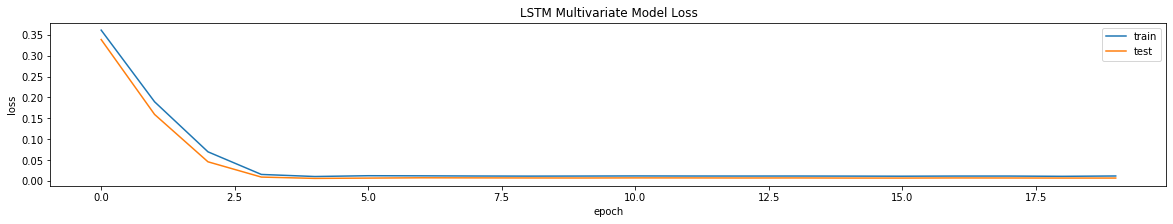

In [90]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Multivariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [91]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE



In [92]:
mae_LSTM_multivariate = mean_absolute_error(inv_y*100, inv_yhat*100)
print('Test MSE: %.5f' % mae_LSTM_multivariate)

Test MSE: 47.36270


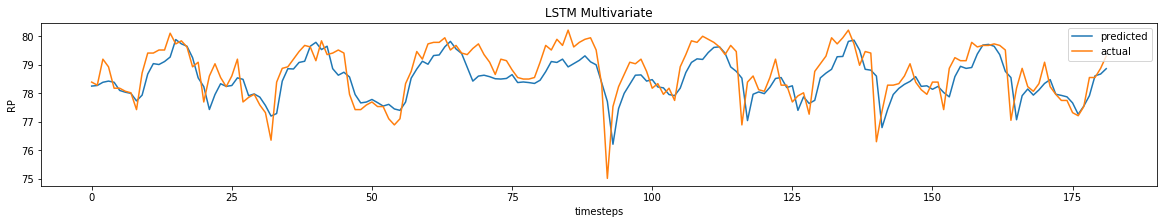

In [93]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('LSTM Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# ARIMA

# Univariate

In [94]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [95]:
# Define the p, d and q parameters to take any value between 0 and 2
p=d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [96]:
# parameters ARIMA(1, 0, 0)x(1, 1, 1, 12)
mod = sm.tsa.statespace.SARIMAX(nov_apr_resample['RP'],
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7411      0.017     42.709      0.000       0.707       0.775
ar.S.L12      -0.1775      0.023     -7.863      0.000      -0.222      -0.133
ma.S.L12      -0.9628      0.007   -128.410      0.000      -0.978      -0.948
sigma2         1.2032      0.030     39.708      0.000       1.144       1.263


C:\Users\rahul\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


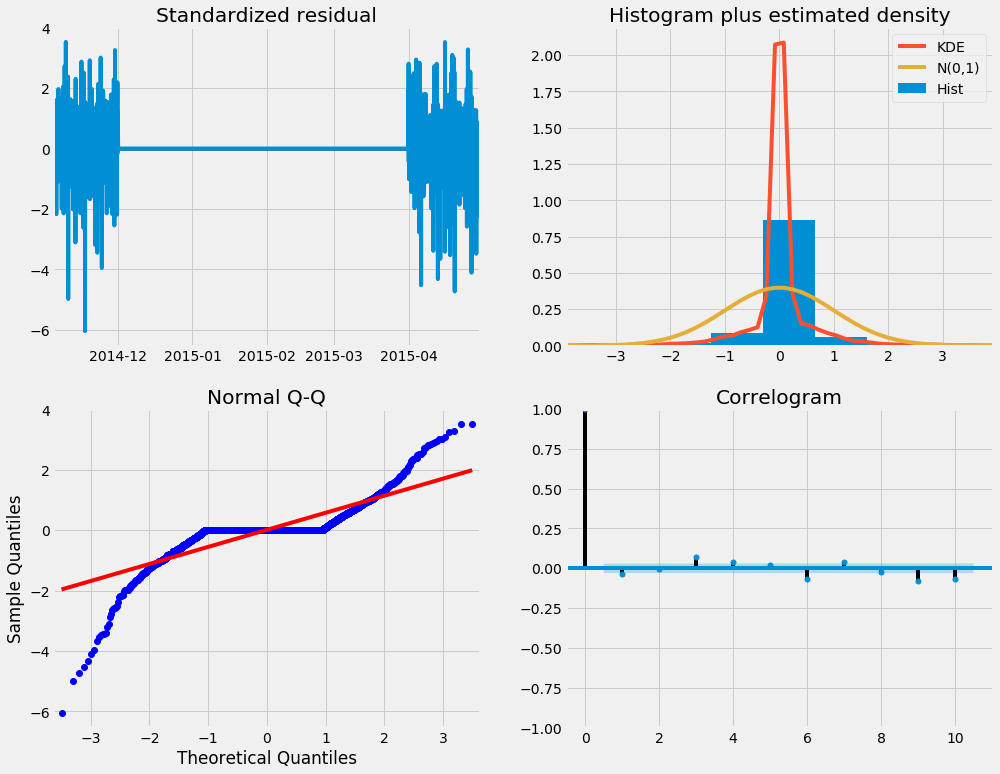

In [97]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [98]:
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

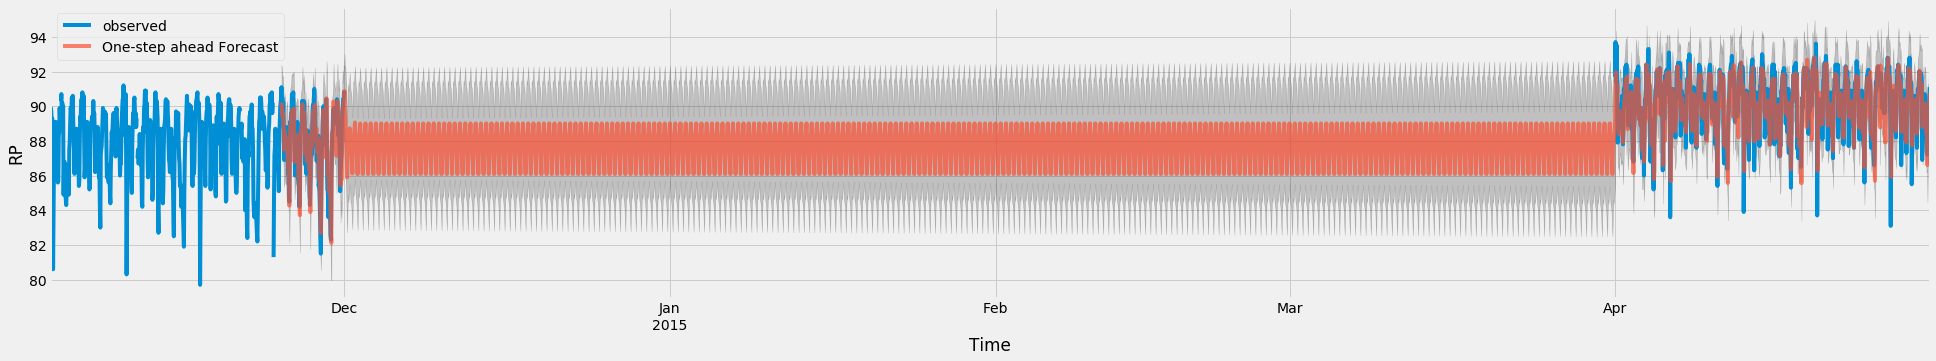

In [99]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 5
ax = nov_apr_resample['RP'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('RP')
plt.legend()

plt.show()

In [100]:
y_forecasted = pred.predicted_mean
y_truth = nov_apr_resample['RP']['2014-11-25':]

In [101]:
ARIMA_univariate_nov_apr_mse= (abs(y_truth*100 - y_forecasted*100)).mean()

In [102]:
y_forecasted.astype("float")

time_corrected
2014-11-25 00:00:00    90.203091
2014-11-25 01:00:00    89.906825
2014-11-25 02:00:00    89.447907
2014-11-25 03:00:00    89.619796
2014-11-25 04:00:00    89.286124
                         ...    
2015-04-30 19:00:00    89.161969
2015-04-30 20:00:00    88.760633
2015-04-30 21:00:00    89.877375
2015-04-30 22:00:00    90.115002
2015-04-30 23:00:00    90.807066
Freq: H, Length: 3768, dtype: float64

In [103]:
ARIMA_univariate_nov_apr_mse

79.78299884646104

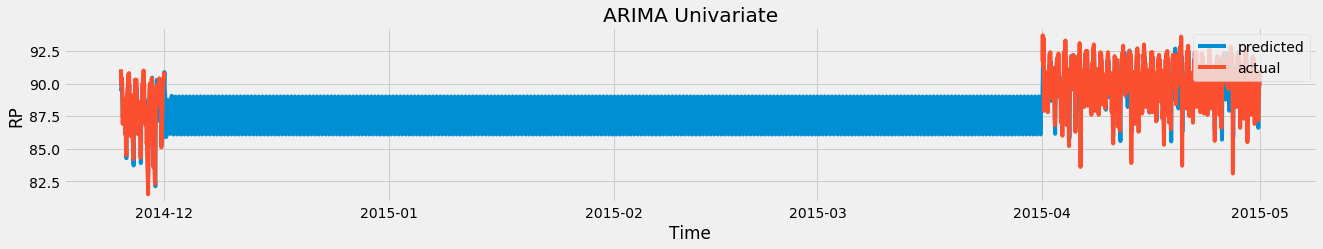

In [104]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(y_forecasted)
plt.plot(y_truth)
plt.title('ARIMA Univariate')
plt.ylabel('RP')
plt.xlabel('Time')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# Multivariate


In [105]:
train =nov_apr_resample.loc[:,'RP']
exog = nov_apr_resample.loc[:,'traffic information']

In [106]:
exog = exog.replace([np.inf, -np.inf], np.nan).fillna(0) 

In [107]:
mod = sm.tsa.statespace.SARIMAX(train, exog=exog.astype('float64'), trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary().tables[1])

                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
traffic information     0.5751      0.041     14.096      0.000       0.495       0.655
ar.S.L12               -0.0460      0.027     -1.719      0.086      -0.098       0.006
ma.S.L12               -0.9885      0.005   -217.308      0.000      -0.997      -0.980
sigma2                  1.2700      0.030     42.029      0.000       1.211       1.329


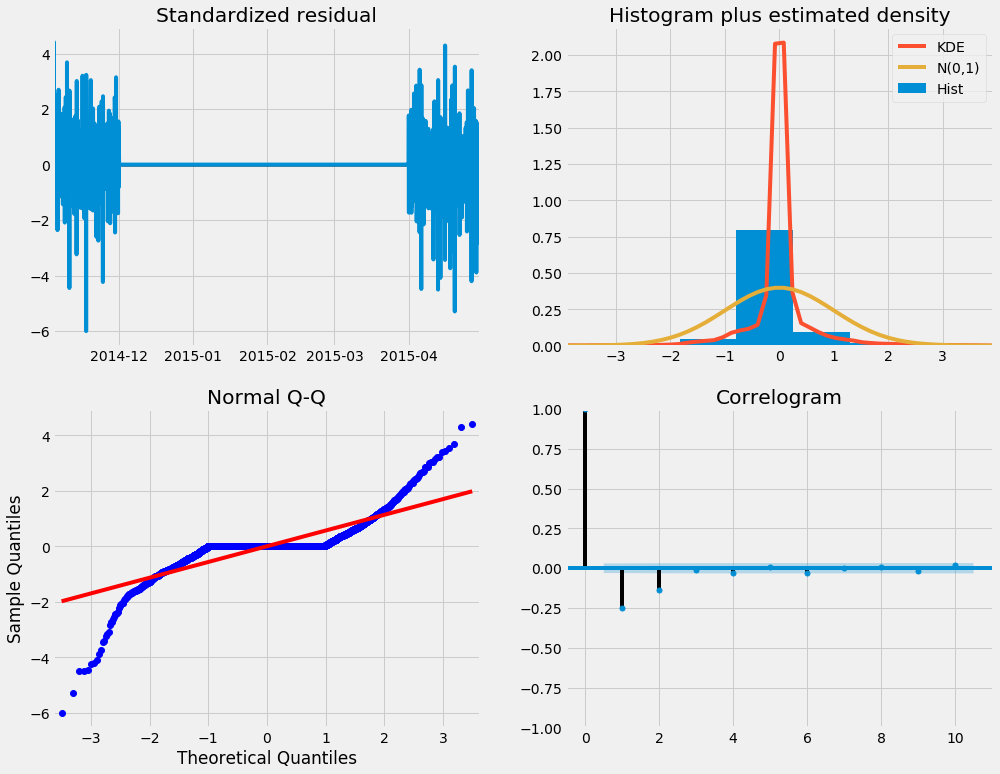

In [108]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [109]:
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

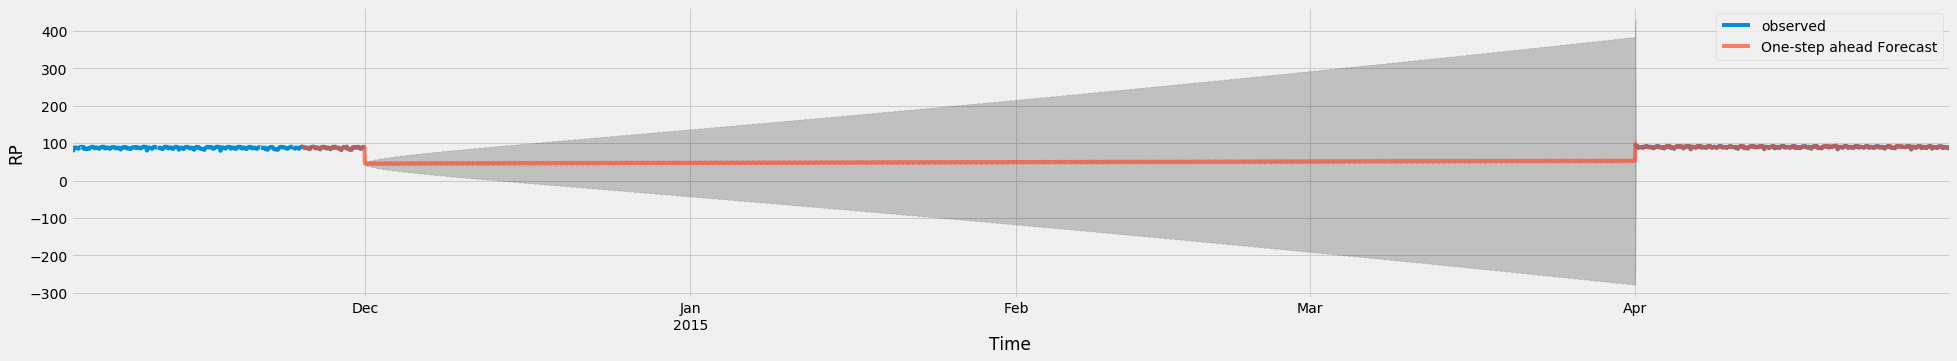

In [110]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 5
ax = nov_apr_resample['RP'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('RP')
plt.legend()

plt.show()

In [111]:
exog_forecast = nov_apr_resample.loc['2014-11-25':,'traffic information']
exog_forecast = exog_forecast.replace([np.inf, -np.inf], np.nan).fillna(0) 
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'),exog=exog_forecast, dynamic=False)

In [112]:
y_forecasted = pred.predicted_mean
y_truth = nov_apr_resample['RP']['2014-11-25':]

In [113]:
mae_arima_multivariate = abs(y_forecasted*100 - y_truth*100).mean()

In [114]:
y_forecasted.astype("float")

time_corrected
2014-11-25 00:00:00    90.631825
2014-11-25 01:00:00    90.849510
2014-11-25 02:00:00    89.977929
2014-11-25 03:00:00    90.028813
2014-11-25 04:00:00    89.611530
                         ...    
2015-04-30 19:00:00    89.346536
2015-04-30 20:00:00    88.469045
2015-04-30 21:00:00    90.006061
2015-04-30 22:00:00    89.963480
2015-04-30 23:00:00    90.655927
Freq: H, Length: 3768, dtype: float64

In [115]:
mae_arima_multivariate

80.33559336475194

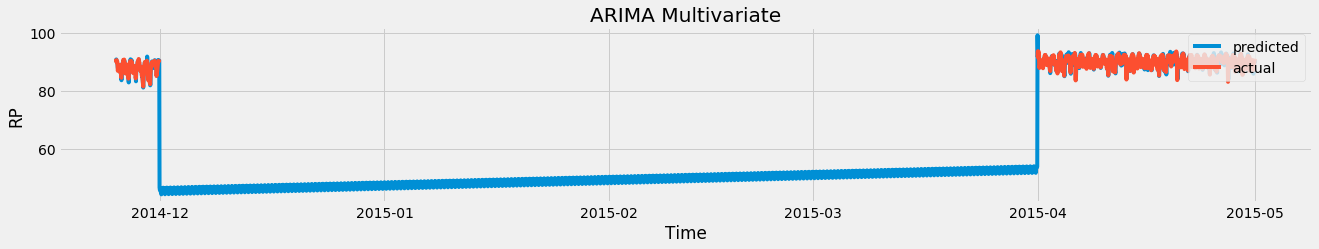

In [116]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(y_forecasted)
plt.plot(y_truth)
plt.title('ARIMA Multivariate')
plt.ylabel('RP')
plt.xlabel('Time')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()